## 1 - Import des modules usuels de traitement de données

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## 2- Import et découverte du dataset

In [2]:
#Import du dataset initial
project = pd.read_csv('Initial dataset/Video_Game_Sales_as_of_Jan_2017.csv')

In [3]:
#Découverte du dataset
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [4]:
#Découverte du dataset
project.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [5]:
#Découverte du dataset
project.describe(include="all")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
count,17416,17416,17408.000000,17416,17415,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,8336.000000,8336.000000,7798.000000,7798.000000,10252
unique,12080,31,NaN,12,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
freq,12,2251,NaN,3503,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4120
mean,NaN,NaN,2006.630859,NaN,NaN,0.254534,0.140727,0.075020,0.045908,0.516469,68.912548,26.192059,7.117056,162.672480,NaN
std,NaN,NaN,5.901598,NaN,NaN,0.800673,0.497341,0.303412,0.183932,1.526124,13.964937,18.991526,1.502410,562.837954,NaN
min,NaN,NaN,1976.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.050000,60.000000,11.000000,6.400000,10.000000,NaN
50%,NaN,NaN,2008.000000,NaN,NaN,0.070000,0.020000,0.000000,0.010000,0.160000,71.000000,21.000000,7.500000,25.000000,NaN
75%,NaN,NaN,2011.000000,NaN,NaN,0.230000,0.100000,0.030000,0.030000,0.450000,79.000000,36.000000,8.200000,81.000000,NaN


## 3 - Cleaning et harmonisation du dataset

In [6]:
# Création d'un dataset clone en vue du nettoyage
cleanproject = project.copy()

### 3.1 - Nettoyage du dataset
- On observe certaines entrées renvoyant des valeurs NULL pour Year ou Publisher. Nous vérifierons ces entrées et les supprimerons en cas de non-pertinence. 
- L'objectif de notre étude est d'observer l'impact des Scorings et Ratings, en vue de prédire les ventes de Jeux Vidéos. L'imputation de médiane ou de moyenne me semblant peu pertinent sur ces variables, en particulier vu le nombre d'enregistrements NULL on décidera de supprimer les lignes ne renvoyant pas d'information sur ces données clé.

#### 3.1.a Cas des colonnes 'Publisher' ou 'Year_of_release' renvoyant NULL

In [7]:
#Entrées renvoyant un Publisher ou une année NULL
print(cleanproject.loc[cleanproject['Publisher'].isnull()])
print(cleanproject.loc[cleanproject['Year_of_Release'].isnull()])

          Name Platform  Year_of_Release   Genre Publisher  NA_Sales  \
16953  Sumioni      PSV              NaN  Action       NaN       0.0   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
16953       0.0      0.01          0.0          0.01           NaN   

       Critic_Count  User_Score  User_Count Rating  
16953           NaN         NaN         NaN    NaN  
                                             Name Platform  Year_of_Release  \
12795                Mobile Ops: The One Year War     X360              NaN   
14210                                Housekeeping       DS              NaN   
14532            Fullmetal Alchemist: Brotherhood      PSP              NaN   
15162                 Wii de Asobu: Metroid Prime      Wii              NaN   
15784  Writing and Speaking Beautiful Japanese DS       DS              NaN   
16176                Ferrari: The Race Experience      Wii              NaN   
16953                                     Sumioni      

On observe que ce sont des données incomplètes et/ou marginales. On supprimera ces quelques entrées.

In [8]:
#Cleaning des lignes mentionnées
cleanproject = cleanproject.dropna(subset =["Year_of_Release","Publisher"])

#### 3.1.b Cas des colonnes principales Score et Rating de notre étude renvoyant NULL

On commencera par une visualisation par année des données clés Score et Rating manquantes vs. le volume de données non-manquantes.

In [9]:
#En vue de la Visualisation, on définit nos clauses "le jeu a tous ses Scorings - User & Critic-" ainsi que "le jeu a un Rating"
cleanproject["Has_Score"] = cleanproject["User_Score"].notnull() & cleanproject["Critic_Score"].notnull()
cleanproject["Has_Rating"] = cleanproject["Rating"].notnull()

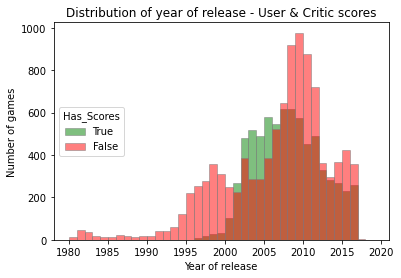

In [10]:
# Histogramme par année des scores manquants vs non-manquants
plt.hist(cleanproject[cleanproject["Has_Score"]==True]["Year_of_Release"], color="green", alpha=0.5, bins=range(1980, 2020), edgecolor="grey")
plt.hist(cleanproject[cleanproject["Has_Score"]==False]["Year_of_Release"], color="red", alpha=0.5, bins=range(1980, 2020), edgecolor="grey")
plt.title("Distribution of year of release - User & Critic scores")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(['True', 'False'],title="Has_Scores", loc=6);

**Concernant les Scores manquants** : On observe que la plupart des données manquantes concernent les jeux pré-année 2000 (données trop anciennes ?) et les jeux centrés autour de l'année 2010, point culminant du nombre de sorties (jeux "noyés" dans le volume de sorties et non-traités ?).

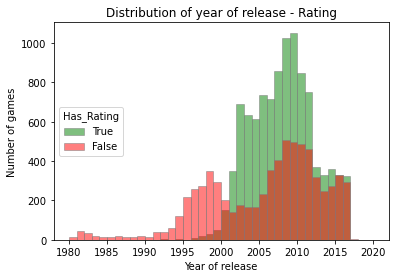

In [11]:
# Histogramme par année des Rating manquants vs non-manquants
plt.hist(cleanproject[cleanproject["Has_Rating"]==True]["Year_of_Release"], color="green", alpha=0.5, bins=range(1980, 2021), edgecolor="grey")
plt.hist(cleanproject[cleanproject["Has_Rating"]==False]["Year_of_Release"], color="red", alpha=0.5, bins=range(1980, 2021), edgecolor="grey")
plt.title("Distribution of year of release - Rating")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(['True', 'False'],title="Has_Rating", loc=6);

**Concernant les Ratings manquants** : Idem, on observe que la plupart des données manquantes concernent les jeux pré-année 2000 (données trop anciennes ?) et les jeux centrés autour de l'année 2010, point culminant du nombre de sorties (jeux "noyés" dans le volume de sorties et non-traités ?).

In [12]:
#Cleaning lié aux Scores et Rating
cleanproject = cleanproject.dropna(subset =["User_Score", "Critic_Score", "Rating"])

In [13]:
#Bilan
cleanproject.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
 15  Has_Score        7112 non-null   bool   
 16  Has_Rating       7112 non-null   bool   
dtypes: bool(2), f

### 3.2 - Gestion des outliers

Le premier regard sur nos données (quartiles du .describe et Data Visualization ci-dessous) fait apparaitre de sérieux outliers sur les colonnes Count, Global_Sales, NA_Sales et EU_Sales.
Les outliers sur les ventes pourraient être intéressants pour identifier les bestsellers mais dans le cadre de ce premier niveau de modèle de prédiction, on décide de les retirer.

On se servira d'une fonction *importée* définissant un outlier comme "toute valeur plus haute (ou plus basse) que le 3ème (ou 1er) quartile + (ou -) 3 interquartiles".

<AxesSubplot:xlabel='User_Count'>

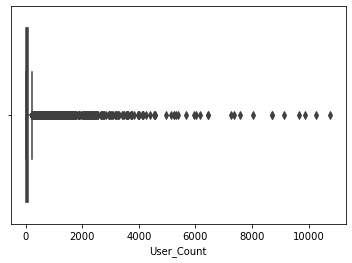

In [14]:
#Diagramme à moustache pour observation des outliers User Count
sns.boxplot(x="User_Count",data=cleanproject)

<AxesSubplot:xlabel='Global_Sales'>

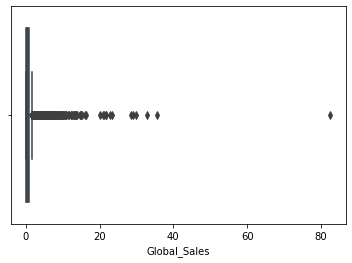

In [15]:
#Diagramme à moustache pour observation des outliers Global Sales
sns.boxplot(x="Global_Sales",data=cleanproject)

<AxesSubplot:xlabel='EU_Sales'>

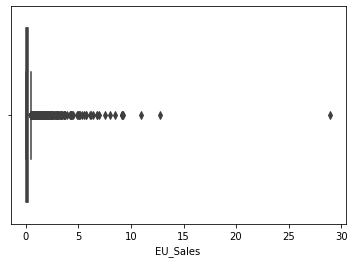

In [16]:
#Diagramme à moustache pour observation des outliers EU Sales
sns.boxplot(x="EU_Sales",data=cleanproject)

<AxesSubplot:xlabel='NA_Sales'>

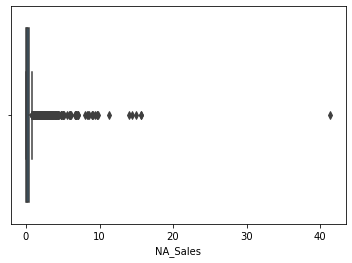

In [17]:
#Diagramme à moustache pour observation des outliers NA Sales
sns.boxplot(x="NA_Sales",data=cleanproject)

In [18]:
#Import de la fonction de définition & suppression des outliers
# Définition de la fonction
def outliers_remover(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Définition de la méthode d'itération : calcul du premier et troisième quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Calcul de l'écart interquartile
        iqr = third_quartile - first_quartile

        # Suppression des outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [19]:
#Lancement de la fonction de suppression des outliers sur nos colonnes User_Count, Global_ Sales, EU_Sales, NA_Sales
cleanproject, clean_user_count = outliers_remover(cleanproject, ["User_Count"])
cleanproject, clean_global = outliers_remover(cleanproject, ["Global_Sales"])
cleanproject, clean_eu = outliers_remover(cleanproject, ["EU_Sales"])
cleanproject, clean_na = outliers_remover(cleanproject, ["NA_Sales"])
cleanproject.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5752 entries, 783 to 17407
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5752 non-null   object 
 1   Platform         5752 non-null   object 
 2   Year_of_Release  5752 non-null   float64
 3   Genre            5752 non-null   object 
 4   Publisher        5752 non-null   object 
 5   NA_Sales         5752 non-null   float64
 6   EU_Sales         5752 non-null   float64
 7   JP_Sales         5752 non-null   float64
 8   Other_Sales      5752 non-null   float64
 9   Global_Sales     5752 non-null   float64
 10  Critic_Score     5752 non-null   float64
 11  Critic_Count     5752 non-null   float64
 12  User_Score       5752 non-null   float64
 13  User_Count       5752 non-null   float64
 14  Rating           5752 non-null   object 
 15  Has_Score        5752 non-null   bool   
 16  Has_Rating       5752 non-null   bool   
dtypes: bool(2),

### 3.3 - Type de donnée de la colonne Year_of_Release

Year_of_Release est reconnu comme un nombre décimal (FLOAT) : on aurait pu modifier le type de donnée pour le faire apparaitre comme une date renvoyant une année (format = %Y), mais on choisira plutôt de calculer une colonne "Age" renvoyant 2021 - la date de sortie du jeu pour faciliter son exploitation.


In [20]:
#Création de la colonne Age et suppression de la colonne Year_of_Release
cleanproject["Age"] = pd.to_numeric(2021 - cleanproject["Year_of_Release"])
cleanproject.drop(['Year_of_Release'],axis  =1, inplace=True)

### 3.4 - Uniformisation des User & Critic Scores

Enfin, on observe que le score attribué par les critiques et par les utilisateurs ne sont pas sur la même base : 100 contre 10. On uniformisera la notation sur une base 100 à des fins de comparaison.

In [21]:
#Uniformisation des notes critiques et utilisateurs
cleanproject['User_Score'] = cleanproject['User_Score']*10

### 3.6 Catégorisation des éditeurs
Du fait de l'important nombre d'éditeurs de jeu de notre dataset, et pour fiabiliser/améliorer l'exploitation des données, on décide de les regrouper en 8 grandes catégories suite à une étude par clustering réalisée sur Tableau Desktop.
1. Mastodonte / Leader du marché (Nombre d'unité vendues supérieur à 200M) 
2. Editeur de majeur (Nombre d'unité vendues compris entre 150M et 200M)
3. Editeur de très grande taille (Nombre d'unité vendues compris entre 100M et 150M)
4. Editeur de grande taille (Nombre d'unité vendues compris entre 50M et 100M) 
5. Editeur de taille moyenne (Nombre d'unité vendues compris entre 20M et 50M) 
6. Editeur de petite taille (Nombre d'unité vendues compris entre 5M et 20M) 
7. Editeur de très petite taille (Nombre d'unité vendues compris entre 1M et 5M) 
8. Editeur mineur ou indépendant (Nombre d'unité vendues inférieur à 1M) 

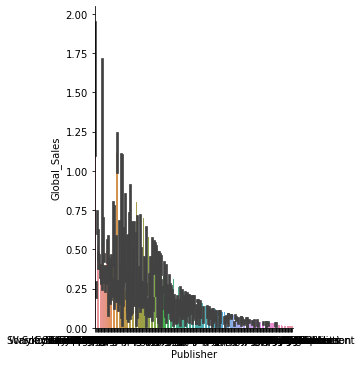

In [22]:
#Distribution pré-traitement : peu lisible et peu exploitable !
sns.catplot(x="Publisher",y="Global_Sales",data=cleanproject,kind="bar")

In [23]:
#On groupe nos éditeurs par ventes totales dans un dataframe dédié
Pcat = cleanproject.groupby(['Publisher']).sum()

In [24]:
#On intègre nos catégories d'éditeur dans le dataframe nouvellement crée
#On profite du traitement par séquence pour simplifier les connecteurs logiques
Pcat.loc[Pcat['Global_Sales'] <= 1, 'Grouped_Publisher'] = 'Mineur ou indépendant'
Pcat.loc[Pcat['Global_Sales'] > 1, 'Grouped_Publisher'] = 'Très petit'
Pcat.loc[Pcat['Global_Sales'] > 5, 'Grouped_Publisher'] = 'Petit'
Pcat.loc[Pcat['Global_Sales'] > 20, 'Grouped_Publisher'] = 'Moyen'
Pcat.loc[Pcat['Global_Sales'] > 50, 'Grouped_Publisher'] = 'Grand'
Pcat.loc[Pcat['Global_Sales'] > 100, 'Grouped_Publisher'] = 'Très grand'
Pcat.loc[Pcat['Global_Sales'] > 150, 'Grouped_Publisher'] = 'Majeur'
Pcat.loc[Pcat['Global_Sales'] > 200, 'Grouped_Publisher'] = 'Mastodonte'
Pcat = Pcat['Grouped_Publisher']

In [25]:
#On crée un nouveau dataset clone qui intégrera cet attribut (catégorie d'éditeur)
#Puis on réalise la jointure sur la base du dataframe Pcat dédié à cet attribut
cleanproject_merged = cleanproject
cleanproject_merged = pd.merge(cleanproject_merged,Pcat, on = ['Publisher'],how="outer")

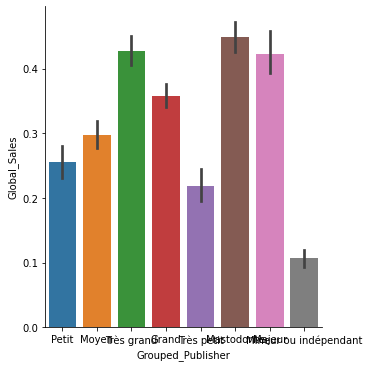

In [26]:
#On étudie la pertinence du clustering sur le dataset complet ajusté. OK !
sns.catplot(x="Grouped_Publisher",y="Global_Sales",data=cleanproject_merged,kind="bar")

# 4 - Vérification du cleaning

In [27]:
cleanproject_merged.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5752 entries, 0 to 5751
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5752 non-null   object 
 1   Platform           5752 non-null   object 
 2   Genre              5752 non-null   object 
 3   Publisher          5752 non-null   object 
 4   NA_Sales           5752 non-null   float64
 5   EU_Sales           5752 non-null   float64
 6   JP_Sales           5752 non-null   float64
 7   Other_Sales        5752 non-null   float64
 8   Global_Sales       5752 non-null   float64
 9   Critic_Score       5752 non-null   float64
 10  Critic_Count       5752 non-null   float64
 11  User_Score         5752 non-null   float64
 12  User_Count         5752 non-null   float64
 13  Rating             5752 non-null   object 
 14  Has_Score          5752 non-null   bool   
 15  Has_Rating         5752 non-null   bool   
 16  Age                5752 

# 5 - Export de nos données

In [28]:
#Export en CSV
cleanproject_merged.to_csv('CleanProject.csv')